In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv("bioyogurt_nfi_gi_dataset.csv")
df.head()

,Sample,Starch_%,Protein_%,Probiotic_%,pH,Viscosity_Pa_s,Taste_Score_10,Glycemic_Index
0,1,5.29,3.87,1.24,4.49,1.17,6.5,73.8
1,2,5.43,3.54,1.26,4.44,1.21,6.4,74.1
2,3,4.07,2.60,2.75,4.41,1.24,6.2,68.8
3,4,4.43,2.78,3.23,4.45,1.37,6.7,69.8
4,5,5.71,2.87,1.40,4.58,1.17,6.4,75.1


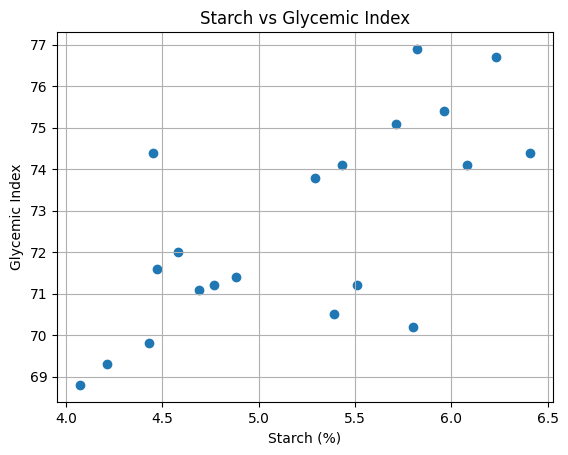

In [3]:


plt.scatter(df["Starch_%"], df["Glycemic_Index"])
plt.xlabel("Starch (%)")
plt.ylabel("Glycemic Index")
plt.title("Starch vs Glycemic Index")
plt.grid(True)
plt.show()


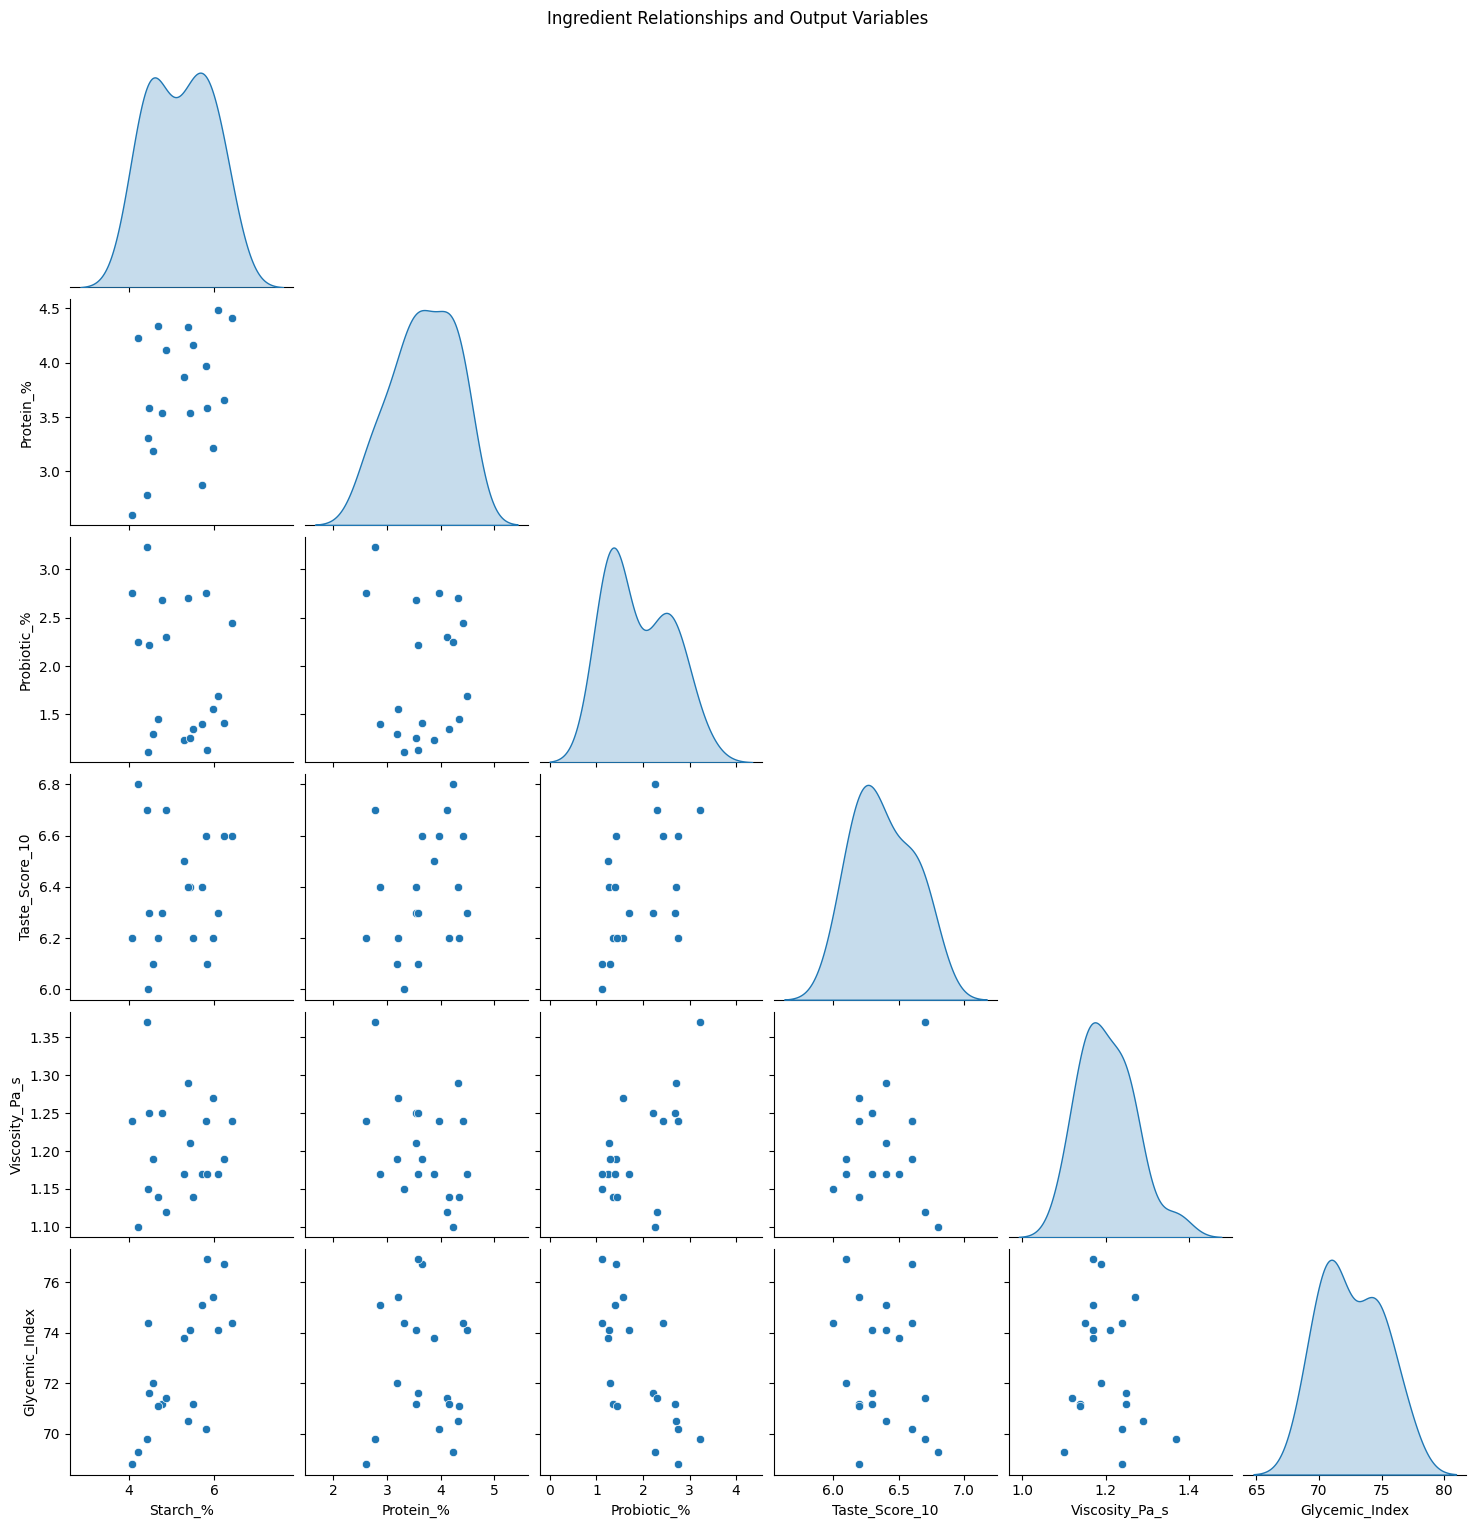

In [4]:


sns.pairplot(df[['Starch_%', 'Protein_%', 'Probiotic_%', 
                 'Taste_Score_10', 'Viscosity_Pa_s', 'Glycemic_Index']],
             diag_kind='kde', corner=True)
plt.suptitle("Ingredient Relationships and Output Variables", y=1.02)
plt.show()


In [6]:


# Features and outputs
X = df[['Starch_%', 'Protein_%', 'Probiotic_%']]
y_targets = {
    "Viscosity_Pa_s": df['Viscosity_Pa_s'],
    "Taste_Score_10": df['Taste_Score_10'],
    "Glycemic_Index": df['Glycemic_Index']
}

models = {}

# Train separate models for each output
for label, y in y_targets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{label} R² score: {r2:.2f}")
    models[label] = model


Viscosity_Pa_s R² score: -0.64
Taste_Score_10 R² score: -0.11
Glycemic_Index R² score: -1.45


In [7]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Viscosity_Coeff': models["Viscosity_Pa_s"].coef_,
    'Taste_Coeff': models["Taste_Score_10"].coef_,
    'GI_Coeff': models["Glycemic_Index"].coef_
})
print(coef_df)


       Feature  Viscosity_Coeff  Taste_Coeff  GI_Coeff
0     Starch_%         0.038677     0.053989  2.016714
1    Protein_%        -0.056676     0.090739 -1.032012
2  Probiotic_%         0.077786     0.214440 -2.403877
